In [2]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
import random
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [3]:
nino3 = np.genfromtxt ('enso_900_2002_1.txt', delimiter=",")
ismr = np.genfromtxt ('sasmi_norm_900_2002.txt', delimiter=",")
dvolc = np.genfromtxt ('sigl.txt', delimiter=",")
dvolc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()
print(nino3.shape)


(1104,)


In [4]:
dvolc_tropical = dvolc.copy()
dvolc_nh = dvolc.copy()
dvolc_sh = dvolc.copy()

is_tropical = np.zeros((dvolc.shape[0]))
is_nh = np.zeros((dvolc.shape[0]))
is_sh = np.zeros((dvolc.shape[0]))

is_tropical[dvolc_source==1.0] = 1.0
is_nh[dvolc_source==2.0] = 1.0
is_sh[dvolc_source==3.0] = 1.0

for i in range(dvolc.shape[0]):
    #print("i = ", i)
    dvolc_tropical[i] = dvolc[i] * is_tropical[i]
    dvolc_nh[i] = dvolc[i] * is_nh[i]
    dvolc_sh[i] = dvolc_sh[i] * is_sh[i]

In [5]:
nino3_900_1850 = nino3[1:952]
ismr_900_1850 = ismr[1:952]
vrf_900_1850 = dvolc[50:]
vrf_source_900_1850 = dvolc_source[50:]

In [6]:
N=10000
volc_year = 0
i = 0
win = 20
year_after_eruption = np.zeros((N))
existing_state = np.zeros((N))
year_before_eruption = np.zeros((N))
phase_coh = np.zeros((N))
ed = np.zeros((N))
lf = np.zeros((N))

while i < N :
    rand_year = random.sample(range(0, vrf_900_1850.shape[0]-win), 1)
    if vrf_source_900_1850[rand_year[0]] != 1.0 : # Tropical Eruptions only
        continue
    if abs(vrf_900_1850[rand_year[0]]) < 3.7:
        continue
    #print(rand_year[0]+900)
    nino3_window = nino3_900_1850[rand_year[0]:rand_year[0]+win]
    ismr_window = nino3_900_1850[rand_year[0]:rand_year[0]+win]
    existing_state[i] = nino3_900_1850[rand_year[0]]
    year_before_eruption[i] = nino3_900_1850[rand_year[0]-1]
    year_after_eruption[i] = nino3_900_1850[rand_year[0]+1]
    i = i + 1


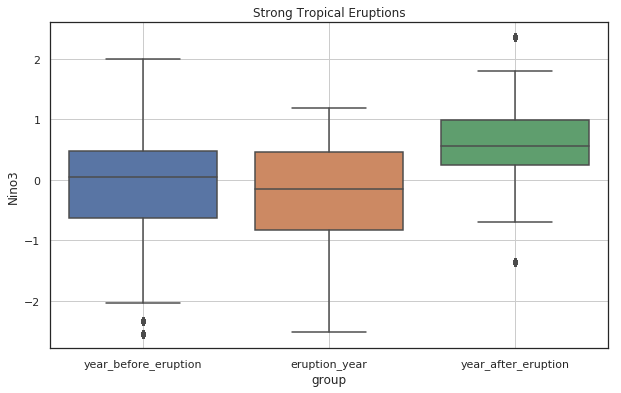

In [7]:
import pandas as pd

ed_df = pd.DataFrame({ 'group' : np.repeat('year_before_eruption',N), 'Nino3': year_before_eruption })
lf_df = pd.DataFrame({ 'group' : np.repeat('eruption_year',N), 'Nino3': existing_state })
phase_coh_df = pd.DataFrame({ 'group' : np.repeat('year_after_eruption',N), 'Nino3': year_after_eruption })

df=ed_df.append(lf_df).append(phase_coh_df)
plt.figure(figsize=(10,6))
sns.set_style(style='white')
sns.boxplot(x='group', y='Nino3', data=df)
plt.title('Strong Tropical Eruptions')
plt.grid()
#plt.savefig('ed_lf.eps', format='eps', dpi=1000)

In [10]:
N=10000
volc_year = 0
i = 0
win = 20
year_after_eruption = np.zeros((N))
existing_state = np.zeros((N))
year_before_eruption = np.zeros((N))
phase_coh = np.zeros((N))
ed = np.zeros((N))
lf = np.zeros((N))

while i < N :
    rand_year = random.sample(range(0, vrf_900_1850.shape[0]-win), 1)
    if vrf_source_900_1850[rand_year[0]] != 2.0 : # NH Eruptions only
        continue
    if abs(vrf_900_1850[rand_year[0]]) < 3.7:
        continue
    #print(rand_year[0]+900)
    nino3_window = nino3_900_1850[rand_year[0]:rand_year[0]+win]
    ismr_window = nino3_900_1850[rand_year[0]:rand_year[0]+win]
    existing_state[i] = nino3_900_1850[rand_year[0]]
    year_before_eruption[i] = nino3_900_1850[rand_year[0]-1]
    year_after_eruption[i] = nino3_900_1850[rand_year[0]+1]
    i = i + 1


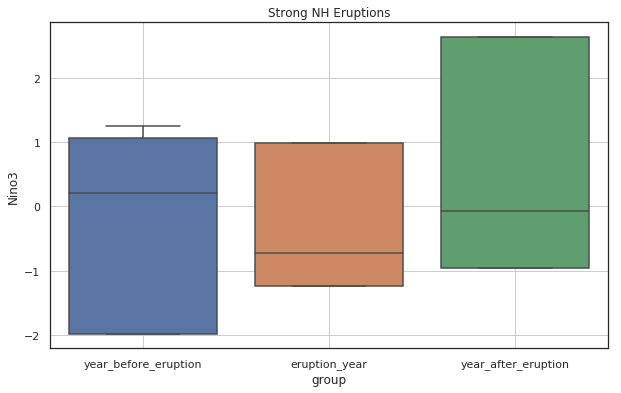

In [11]:
import pandas as pd

ed_df = pd.DataFrame({ 'group' : np.repeat('year_before_eruption',N), 'Nino3': year_before_eruption })
lf_df = pd.DataFrame({ 'group' : np.repeat('eruption_year',N), 'Nino3': existing_state })
phase_coh_df = pd.DataFrame({ 'group' : np.repeat('year_after_eruption',N), 'Nino3': year_after_eruption })

df=ed_df.append(lf_df).append(phase_coh_df)
plt.figure(figsize=(10,6))
sns.set_style(style='white')
sns.boxplot(x='group', y='Nino3', data=df)
plt.title('Strong NH Eruptions')
plt.grid()
#plt.savefig('ed_lf.eps', format='eps', dpi=1000)

In [12]:
N=10000
volc_year = 0
i = 0
win = 20
year_after_eruption = np.zeros((N))
existing_state = np.zeros((N))
year_before_eruption = np.zeros((N))
phase_coh = np.zeros((N))
ed = np.zeros((N))
lf = np.zeros((N))

while i < N :
    rand_year = random.sample(range(0, vrf_900_1850.shape[0]-win), 1)
    if vrf_source_900_1850[rand_year[0]] != 3.0 : # SH Eruptions only
        continue
    #if abs(vrf_900_1850[rand_year[0]]) < 3.7:
    #    continue
    #print(rand_year[0]+900)
    nino3_window = nino3_900_1850[rand_year[0]:rand_year[0]+win]
    ismr_window = nino3_900_1850[rand_year[0]:rand_year[0]+win]
    existing_state[i] = nino3_900_1850[rand_year[0]]
    year_before_eruption[i] = nino3_900_1850[rand_year[0]-1]
    year_after_eruption[i] = nino3_900_1850[rand_year[0]+1]
    i = i + 1

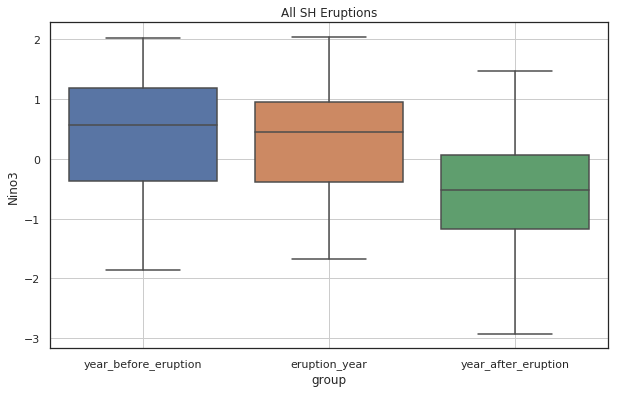

In [14]:
import pandas as pd

ed_df = pd.DataFrame({ 'group' : np.repeat('year_before_eruption',N), 'Nino3': year_before_eruption })
lf_df = pd.DataFrame({ 'group' : np.repeat('eruption_year',N), 'Nino3': existing_state })
phase_coh_df = pd.DataFrame({ 'group' : np.repeat('year_after_eruption',N), 'Nino3': year_after_eruption })

df=ed_df.append(lf_df).append(phase_coh_df)
plt.figure(figsize=(10,6))
sns.set_style(style='white')
sns.boxplot(x='group', y='Nino3', data=df)
plt.title('All SH Eruptions')
plt.grid()

In [60]:
N=10000
volc_year = 0
i = 0
win = 20
year_after_eruption = np.zeros((N))
existing_state = np.zeros((N))
year_before_eruption = np.zeros((N))

ismr_year_after_eruption_before_el_nino = np.zeros((N))
ismr_year_after_eruption_before_neutral = np.zeros((N))
ismr_year_after_eruption_before_la_nina = np.zeros((N))

nino3_year_after_eruption_before_el_nino = np.zeros((N))
nino3_year_after_eruption_before_neutral = np.zeros((N))
nino3_year_after_eruption_before_la_nina = np.zeros((N))

phase_coh = np.zeros((N))
ed = np.zeros((N))
lf = np.zeros((N))

while i < N :
    rand_year = random.sample(range(0, vrf_900_1850.shape[0]-win), 1)
    if vrf_source_900_1850[rand_year[0]] != 1.0 : # SH Eruptions only
        continue
    if abs(vrf_900_1850[rand_year[0]]) < 3.7:
        continue
    #print(rand_year[0]+900)
    if nino3_900_1850[rand_year[0]-1] >0.5: # before the eruption year : el nino
        continue
    ismr_year_after_eruption_before_el_nino[i] = ismr_900_1850[rand_year[0]+1]
    nino3_year_after_eruption_before_el_nino[i] = nino3_900_1850[rand_year[0]+1]
    i = i + 1

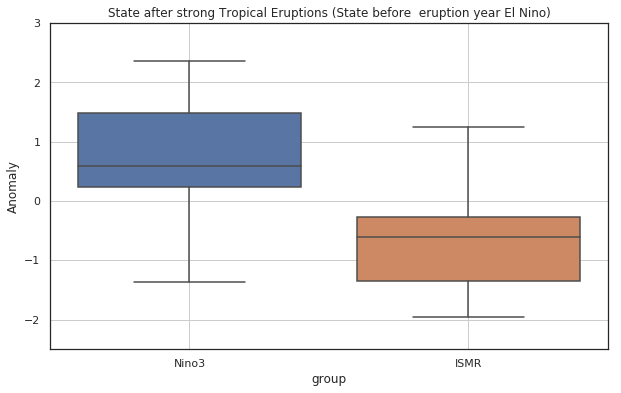

In [61]:
import pandas as pd

df1 = pd.DataFrame({ 'group' : np.repeat('Nino3',N), 'Anomaly': nino3_year_after_eruption_before_el_nino })
df2 = pd.DataFrame({ 'group' : np.repeat('ISMR',N), 'Anomaly':  ismr_year_after_eruption_before_el_nino})

df=df1.append(df2)
plt.figure(figsize=(10,6))
sns.set_style(style='white')
sns.boxplot(x='group', y='Anomaly', data=df)
plt.title('State after strong Tropical Eruptions (State before  eruption year El Nino)')
plt.ylim([-2.5,3])
plt.grid()

In [62]:
N=10000
volc_year = 0
i = 0
win = 20
year_after_eruption = np.zeros((N))
existing_state = np.zeros((N))
year_before_eruption = np.zeros((N))

ismr_year_after_eruption_before_el_nino = np.zeros((N))
ismr_year_after_eruption_before_neutral = np.zeros((N))
ismr_year_after_eruption_before_la_nina = np.zeros((N))

nino3_year_after_eruption_before_el_nino = np.zeros((N))
nino3_year_after_eruption_before_neutral = np.zeros((N))
nino3_year_after_eruption_before_la_nina = np.zeros((N))

phase_coh = np.zeros((N))
ed = np.zeros((N))
lf = np.zeros((N))

while i < N :
    rand_year = random.sample(range(0, vrf_900_1850.shape[0]-win), 1)
    if vrf_source_900_1850[rand_year[0]] != 1.0 : # SH Eruptions only
        continue
    #if abs(vrf_900_1850[rand_year[0]]) < 3.7:
    #    continue
    #print(rand_year[0]+900)
    if nino3_900_1850[rand_year[0]-1] <-0.5: # before the eruption year : la nina
        continue
    ismr_year_after_eruption_before_la_nina[i] = ismr_900_1850[rand_year[0]+1]
    nino3_year_after_eruption_before_la_nina[i] = nino3_900_1850[rand_year[0]+1]
    i = i + 1

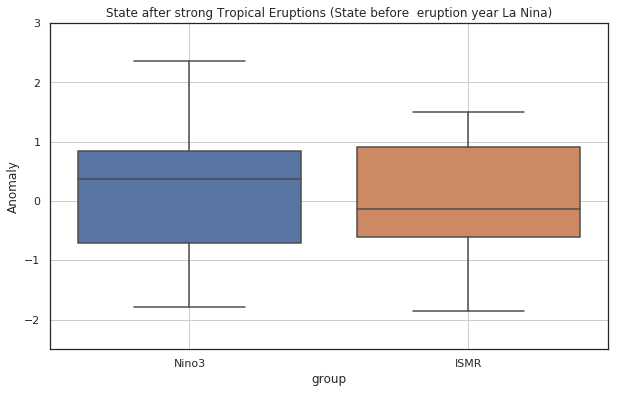

In [63]:
import pandas as pd

df1 = pd.DataFrame({ 'group' : np.repeat('Nino3',N), 'Anomaly': nino3_year_after_eruption_before_la_nina })
df2 = pd.DataFrame({ 'group' : np.repeat('ISMR',N), 'Anomaly':  ismr_year_after_eruption_before_la_nina})

df=df1.append(df2)
plt.figure(figsize=(10,6))
sns.set_style(style='white')
sns.boxplot(x='group', y='Anomaly', data=df)
plt.title('State after strong Tropical Eruptions (State before  eruption year La Nina)')
plt.ylim([-2.5,3])
plt.grid()

In [64]:
N=10000
volc_year = 0
i = 0
win = 20
year_after_eruption = np.zeros((N))
existing_state = np.zeros((N))
year_before_eruption = np.zeros((N))

ismr_year_after_eruption_before_el_nino = np.zeros((N))
ismr_year_after_eruption_before_neutral = np.zeros((N))
ismr_year_after_eruption_before_la_nina = np.zeros((N))

nino3_year_after_eruption_before_el_nino = np.zeros((N))
nino3_year_after_eruption_before_neutral = np.zeros((N))
nino3_year_after_eruption_before_la_nina = np.zeros((N))

phase_coh = np.zeros((N))
ed = np.zeros((N))
lf = np.zeros((N))

while i < N :
    rand_year = random.sample(range(0, vrf_900_1850.shape[0]-win), 1)
    if vrf_source_900_1850[rand_year[0]] != 1.0 : # SH Eruptions only
        continue
    #if abs(vrf_900_1850[rand_year[0]]) < 3.7:
    #    continue
    #print(rand_year[0]+900)
    if -0.5< nino3_900_1850[rand_year[0]-1] <0.5: # before the eruption year : neutral
        continue
    ismr_year_after_eruption_before_neutral[i] = ismr_900_1850[rand_year[0]+1]
    nino3_year_after_eruption_before_neutral[i] = nino3_900_1850[rand_year[0]+1]
    i = i + 1

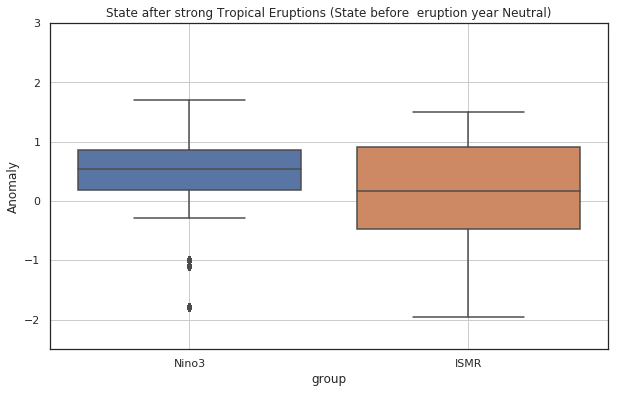

In [65]:
import pandas as pd

df1 = pd.DataFrame({ 'group' : np.repeat('Nino3',N), 'Anomaly': nino3_year_after_eruption_before_neutral })
df2 = pd.DataFrame({ 'group' : np.repeat('ISMR',N), 'Anomaly':  ismr_year_after_eruption_before_neutral})

df=df1.append(df2)
plt.figure(figsize=(10,6))
sns.set_style(style='white')
sns.boxplot(x='group', y='Anomaly', data=df)
plt.title('State after strong Tropical Eruptions (State before  eruption year Neutral)')
plt.ylim([-2.5,3])
plt.grid()